In [1]:
import processing as pr
from filters.blur import *
from filters.distributions import *
from filters.noise import *
from filters.denoise import *
from implementations.richardson_lucy import RihardsonLucy
from implementations.MAP import MAP
from algorithms.HQMotionBlurRestoration.HQMBR import HQMBR
from algorithms.HQMotionBlurRestoration.convolve  import create_line_psf

from algorithms.test_algorithm import TestAlgorithm
from algorithms.test2_algorithm import TestAlgorithm2
from algorithms.test3_algorithm import TestAlgorithm3

import cv2 as cv
import numpy as np

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
tmp = pr.Processing('images','blured','restored')
tmp.read_one('3096.png')
# tmp.read_one('fly.jpg')

In [3]:
fl1 = GaussianNoise(20)    #фильтры для разных шумов и смазов (см. абстрактный класс filter.FILTER_BASE)
fl2 = PoissonNoise(0.01)
fl4 = SaltAndPepperNoise([1,1,1000])
fl8 = DefocusBlur(gaussian_distribution, param=10,kernel_size = 15)
fl9 = MotionBlur(gaussian_distribution, param=10.0,angle=100,kernel_length=11)

shape_points = np.column_stack([[-1.0,2.0,0.0,-1.0,3.0],[0.0,2.0,-1.0,-1.5,1.5]])
intensity_points = np.column_stack([[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],[0.0,0.9,0.1,0.3,0.7,0.7,0.1,0.0,0.2,0.35,0.0]])
fl10 = BSpline_blur(shape_points=shape_points,intensity_points=intensity_points,shape_degree=2,intensity_degree=3,output_size=(15,15))

fl11 = OldPhotoNoise()
fl12 = ColoredNoise(noise_level=0.2,beta=1)
fl13 = ColoredNoise(noise_level=0.2,beta=2)


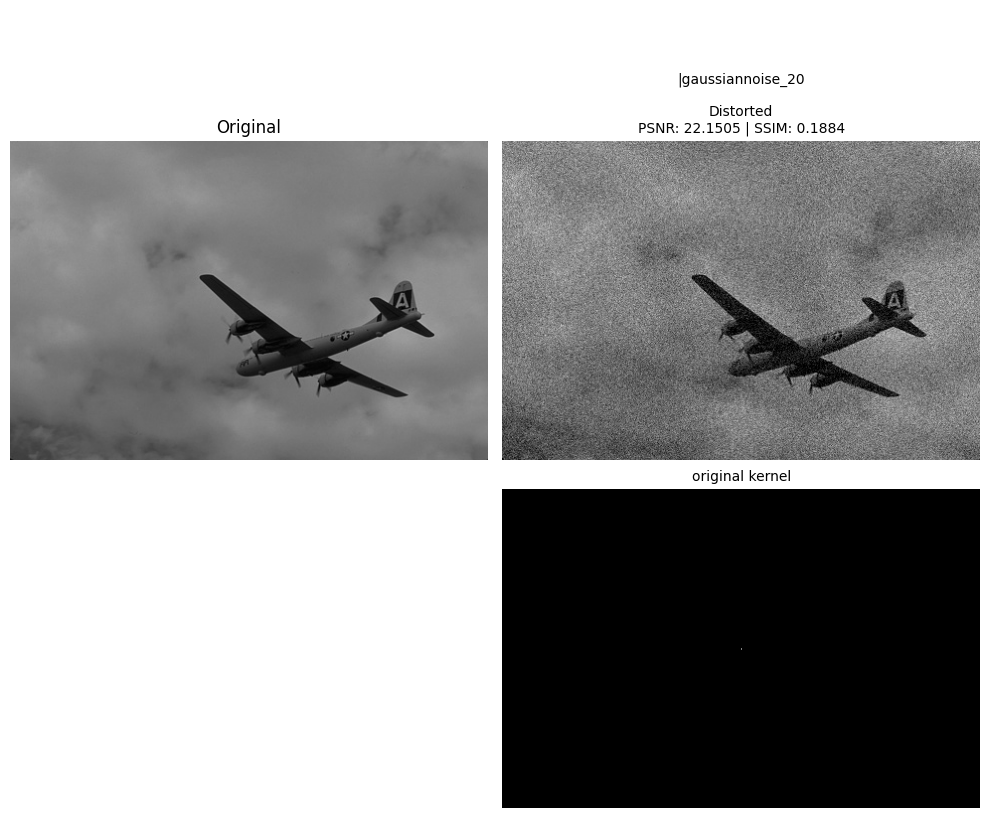

In [4]:
# tmp.filter(fl2)

tmp.filter(fl1)

# tmp.filter(fl4)

tmp.show()

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\_core\fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\_core\_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
d:\for_proga\franework_deconvolution\framework (9)\filters\denoise.py:117: RuntimeWarning: invalid value encountered in cast
  return np.clip(denoised_image,0.0,255.0).astype(image.dtype)


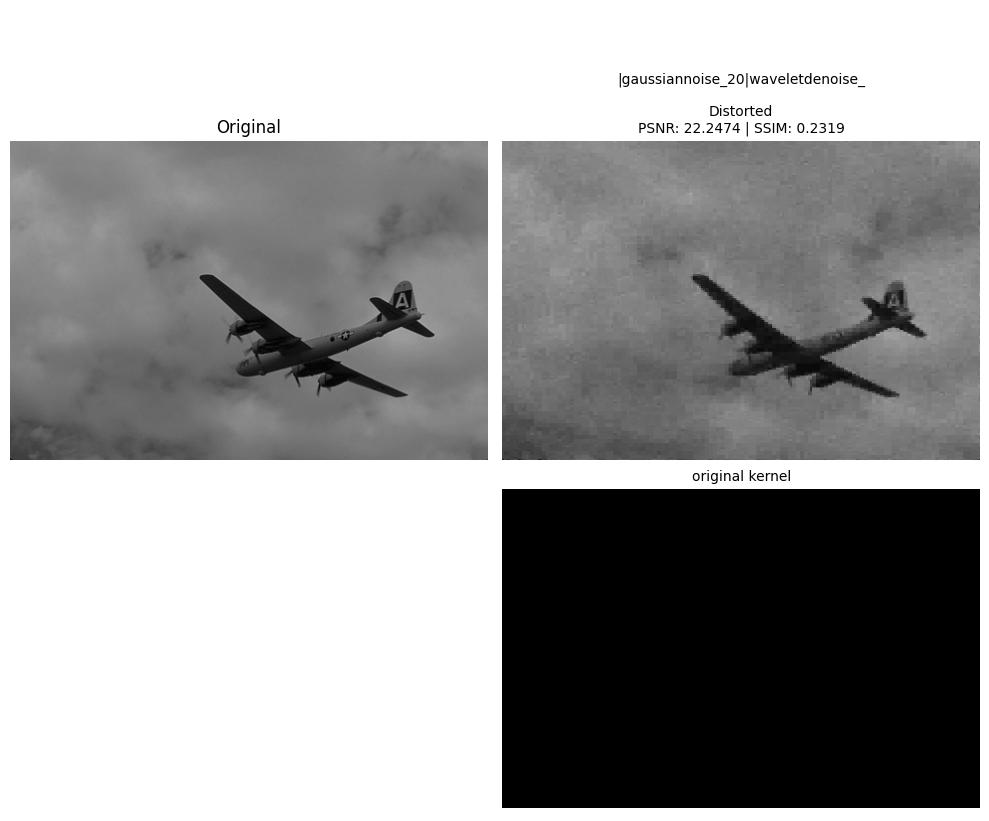

In [5]:
# tmp.histogram_equalization(view_histogram=True)

den1 = LinearSmoothing(3)
den2 = AnisotropicDiffusion(niter=20,kappa=10,gamma=0.25,option=2)
den3 = NonLocalMeans(fast=True, sigma_coef = 0.0025, patch_size=5, patch_distance=6)
den4 = MedianFilter(param=5)
den5 = Wavelet(method='BayesShrink',mode='soft',rescale_sigma=True)

# tmp.filter(den1)
# tmp.filter(den2)
# tmp.filter(den3)
# tmp.filter(den4)
tmp.filter(den5)


tmp.show()

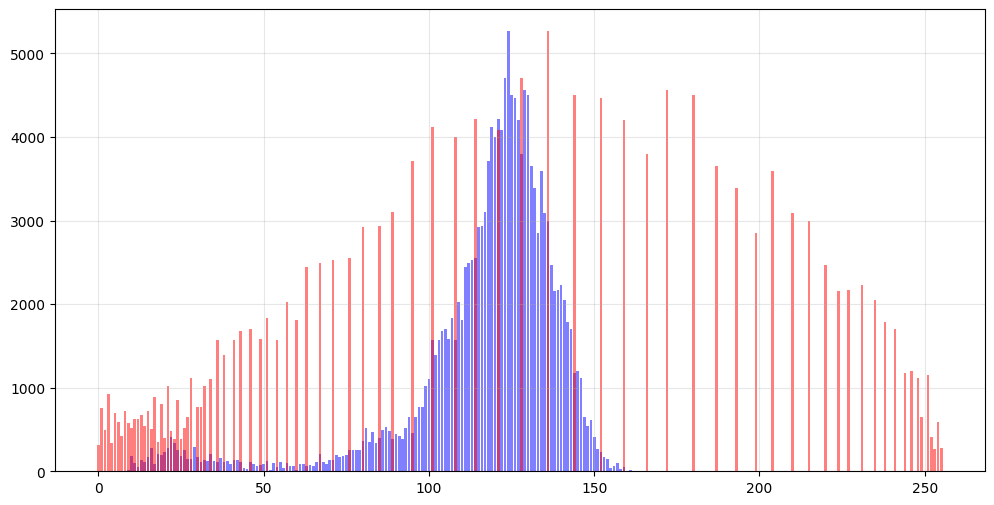

In [6]:
tmp.histogram_equalization(view_histogram=True)

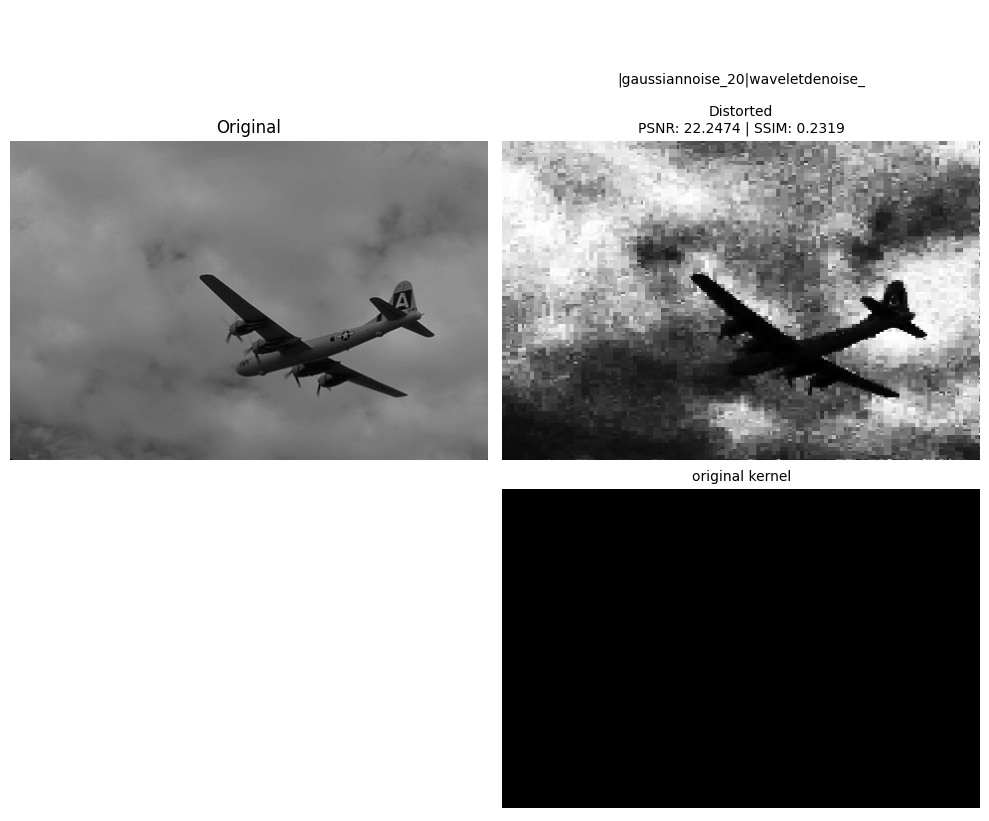

In [7]:
tmp.show()

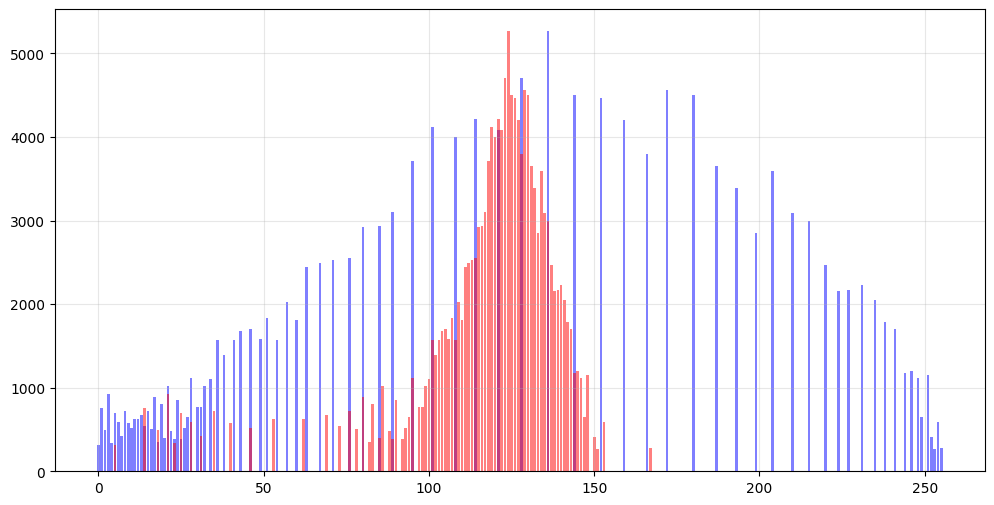

In [8]:
tmp.inverse_histogram_equalization(view_histogram=True)

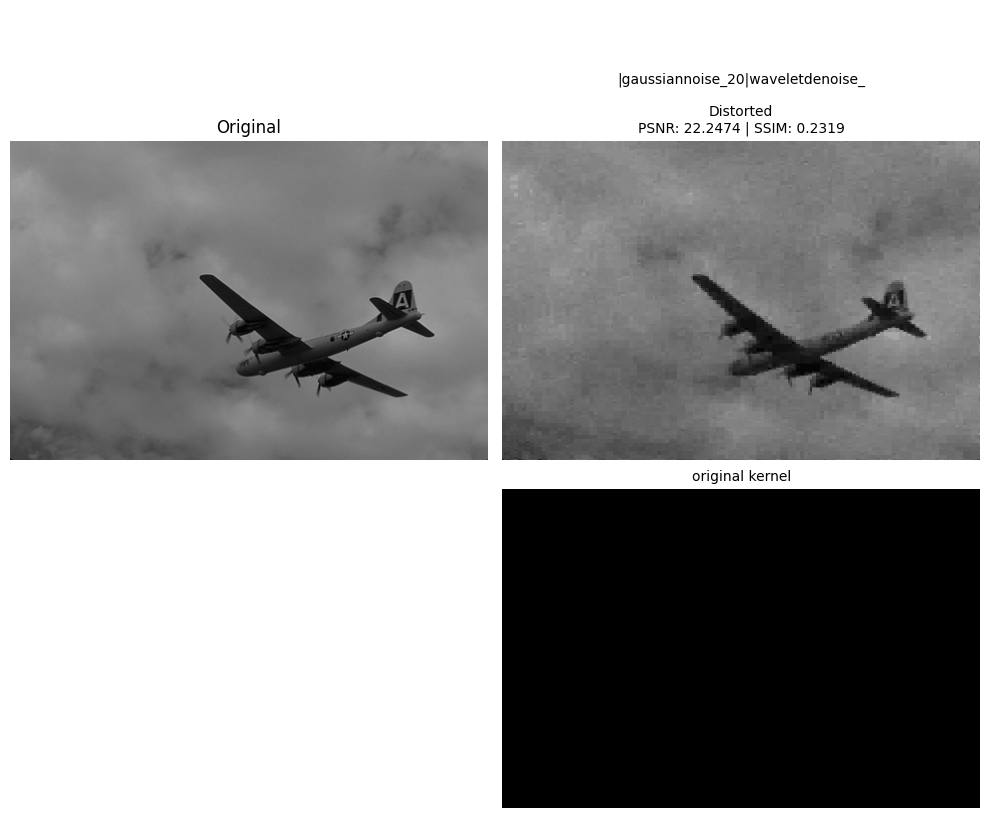

In [9]:
tmp.show()

In [ ]:
# tmp.clear_output_directory()

Deleted: blured\3096.png
Deleted: blured\3096_1.png
Deleted: blured\3096_10.png
Deleted: blured\3096_11.png
Deleted: blured\3096_12.png
Deleted: blured\3096_13.png
Deleted: blured\3096_14.png
Deleted: blured\3096_15.png
Deleted: blured\3096_16.png
Deleted: blured\3096_17.png
Deleted: blured\3096_18.png
Deleted: blured\3096_19.png
Deleted: blured\3096_2.png
Deleted: blured\3096_20.png
Deleted: blured\3096_21.png
Deleted: blured\3096_22.png
Deleted: blured\3096_23.png
Deleted: blured\3096_24.png
Deleted: blured\3096_25.png
Deleted: blured\3096_26.png
Deleted: blured\3096_27.png
Deleted: blured\3096_28.png
Deleted: blured\3096_29.png
Deleted: blured\3096_3.png
Deleted: blured\3096_30.png
Deleted: blured\3096_31.png
Deleted: blured\3096_32.png
Deleted: blured\3096_33.png
Deleted: blured\3096_34.png
Deleted: blured\3096_35.png
Deleted: blured\3096_36.png
Deleted: blured\3096_37.png
Deleted: blured\3096_38.png
Deleted: blured\3096_39.png
Deleted: blured\3096_4.png
Deleted: blured\3096_40.png